# Guiding questions

In which fields does the international student population overtake the domestic student population?

How important a role do international students play in our graduate programs?

Are students making compromises in academic choices in order to receive better chances of getting work visa?

In [4]:
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../data/GSS_Columbia_Detailed.csv', header=4, index_col=False, thousands=',')
df.columns = ['Year', 'Institution Name', 'Detailed Fields', 'Citizenship', 'Count']
df = df.drop('Institution Name', 1) # We know all data describes Columbia
df = df[1:-3] # Drop first row (total of everything) annd last 3 rows (footnotes)
df.head()

,Year,Detailed Fields,Citizenship,Count
1,2016,Total for selected values,Total for selected values,6498.0
2,2016,Anthropology,Total for selected values,94.0
3,2016,Anthropology,Foreign nationals,43.0
4,2016,Anthropology,U.S. citizens and permanent residents (non-U.S...,51.0
5,2016,Astronomy and astrophysics,Total for selected values,28.0


In [6]:
d = defaultdict(lambda: defaultdict(dict))

for _, row in df.iterrows():
    d[int(row['Year'])][row['Detailed Fields']][row['Citizenship']] = row['Count']

In [7]:
DOM_COL_NAME = 'U.S. citizens and permanent residents (non-U.S. citizens holding green cards)'
INT_COL_NAME = 'Foreign nationals'

DOM_LABEL = 'U.S. citizens & permanent residents'
INT_LABEL = INT_COL_NAME

In [8]:
years = np.arange(1994, 2017)

def plotField(ax, field):
    domestic = []
    international = []
    
    for year in years:
        counts = d[year][field]
        domestic.append(counts.get(DOM_COL_NAME, None))
        international.append(counts.get(INT_COL_NAME, None))

    ax.plot(years, domestic, label=DOM_LABEL)
    ax.plot(years, international, label=INT_LABEL)
    
    ax.set_title(field)
    ax.set(xlabel='Year', ylabel='Number of graduate students')

IndexError: index 16 is out of bounds for axis 0 with size 16

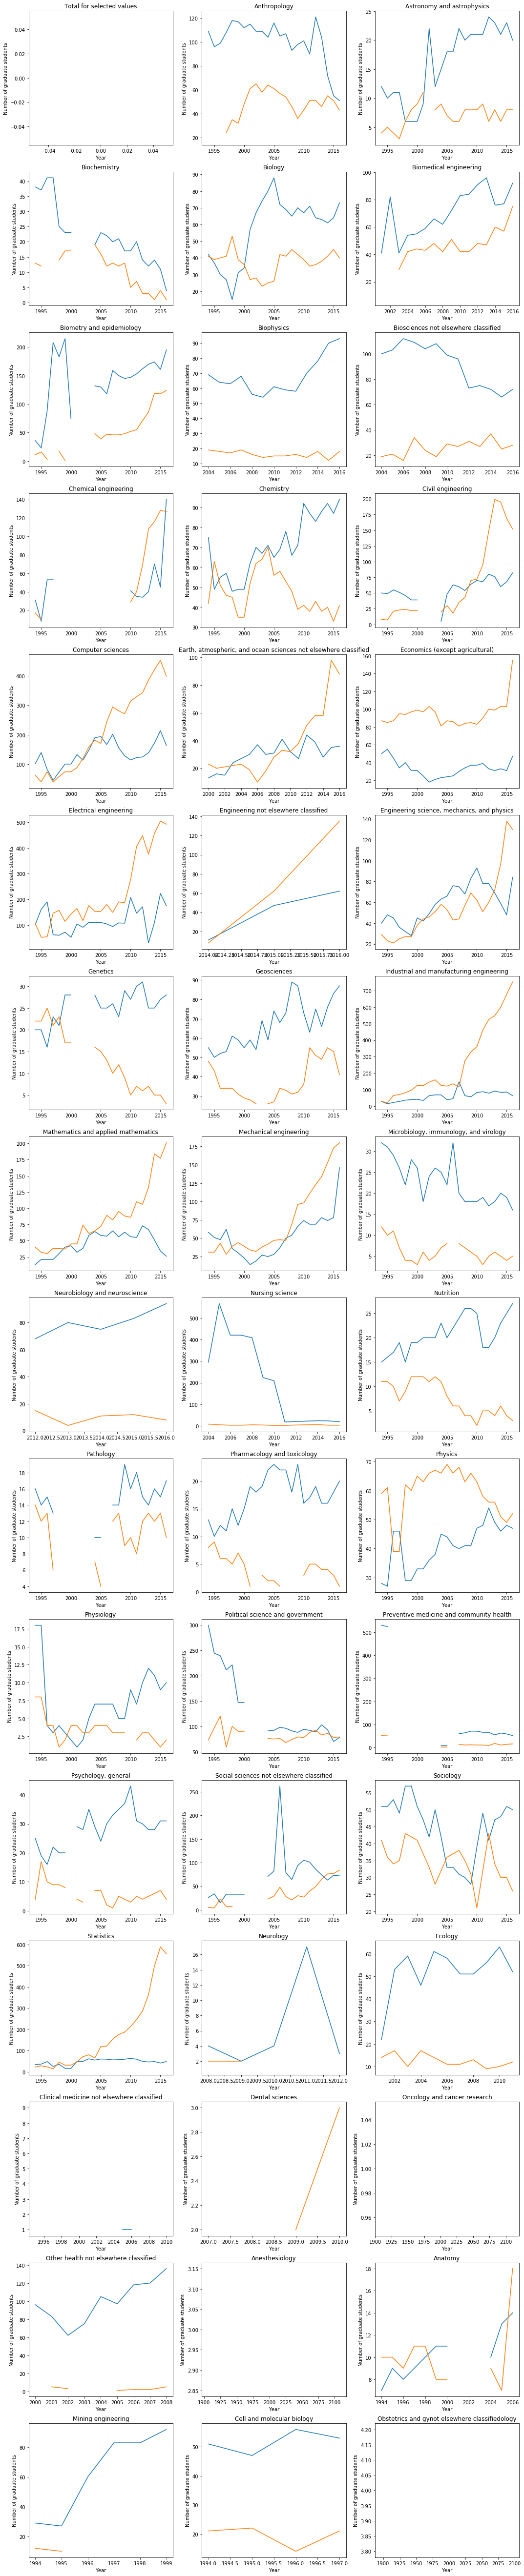

In [180]:
fields = df['Detailed Fields'].unique()

cols = 3
rows = int(len(fields) / cols)

_, axarr = plt.subplots(rows, cols, figsize=(6 * cols, 6 * rows))

for i in range(len(fields)):
    plotField(axarr[ i // cols, i % cols ], fields[i])
    
axarr[0, 0].legend()

Let's isolate those STEM fields that see the greatest international student increases.

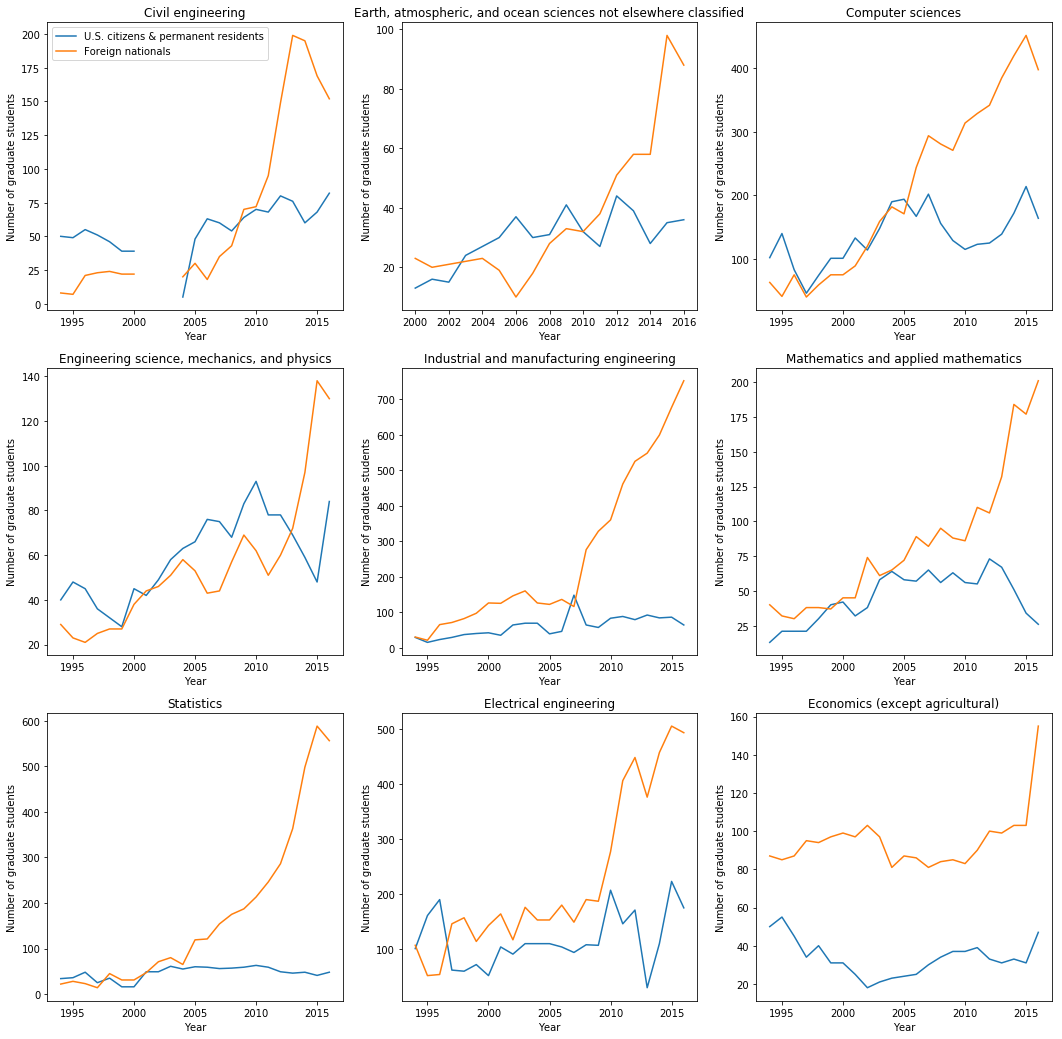

In [13]:
fieldsOfInterest = [
    'Civil engineering',
    'Earth, atmospheric, and ocean sciences not elsewhere classified',
    'Computer sciences',
    'Engineering science, mechanics, and physics',
    'Industrial and manufacturing engineering',
    'Mathematics and applied mathematics',
    'Statistics',    
    'Electrical engineering',
    'Economics (except agricultural)',
]

_, axarr = plt.subplots(3, 3, figsize=(18, 18))

for i in range(len(fieldsOfInterest)):
    plotField(axarr[i // 3, i % 3], fieldsOfInterest[i])
axarr[0, 0].legend()

## Findings